<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#folders" data-toc-modified-id="folders-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>folders</a></span></li><li><span><a href="#test" data-toc-modified-id="test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>test</a></span></li><li><span><a href="#test-with-gt" data-toc-modified-id="test-with-gt-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>test with gt</a></span></li></ul></div>

## imports

In [1]:
import os
import pandas as pd
import numpy as np
import glob2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2
from PIL import Image

%config Completer.use_jedi = False

## folders

In [2]:
data_folder = r'E:\Xing\Covid_19_xray\data'

In [3]:
df_train = pd.read_csv(os.path.join(data_folder,'train_split.txt'), delimiter = " ", header=None)
df_train.columns=['key','filename','label','dataset']

In [4]:
df_train.reset_index(inplace=True,drop=True)

In [5]:
df_train.head()

,key,filename,label,dataset
0,5,ARDSSevere.png,negative,cohen
1,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
2,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
3,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
4,28,pneumocystis-pneumonia-2-PA.png,negative,cohen


<AxesSubplot:>

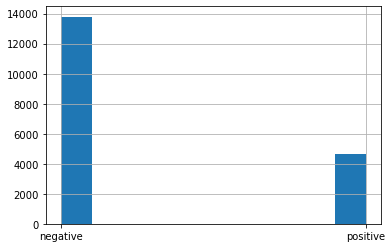

In [35]:
df_train.label.hist()

<AxesSubplot:>

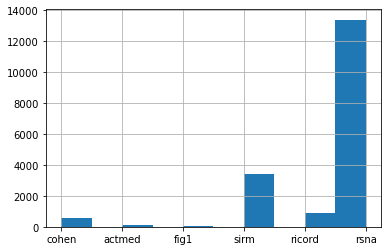

In [6]:
df_train.dataset.hist()

In [36]:
df_train['valid']=0

In [42]:
df_train.shape

(18443, 5)

In [37]:
df_test = pd.read_csv(os.path.join(data_folder,'test_split.txt'), delimiter = " ", header=None)
df_test.columns=['key','filename','label','dataset']

In [38]:
df_test.head()

,key,filename,label,dataset
0,ANON193,CR.1.2.840.113564.1722810170.20200418154808640...,negative,actmed
1,ANON175,CR.1.2.840.113564.192168196.202004061040521478...,negative,actmed
2,ANON216,DX.1.2.840.113564.1722810162.20200321192719071...,negative,actmed
3,ANON156,DX.1.2.840.113564.1722810162.20200324090442116...,negative,actmed
4,ANON141,DX.1.2.840.113564.1722810162.20200324173135171...,negative,actmed


In [41]:
df_test.shape

(374, 4)

<AxesSubplot:>

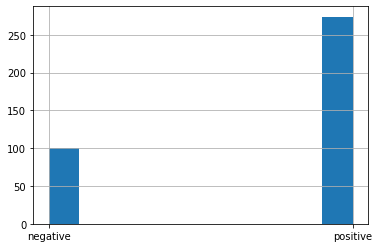

In [40]:
df_test.label.hist()

In [43]:
df_test['valid']=1

In [44]:
df_main = pd.concat([df_train,df_test])

In [45]:
df_main.shape

(18817, 5)

In [49]:
df_main.to_csv('df_main.csv')

In [47]:
df_main['label_num'] = df_main.apply(lambda x: 0 if x['label']=='negative' else 1, axis = 1)

<AxesSubplot:>

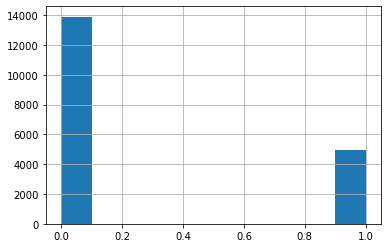

In [48]:
df_main.label_num.hist()

## test

In [2]:
test_folder = r'E:\Xing\Covid_19_xray\data\test\deidcxr\pngdeid'
files = glob2.glob(os.path.join(test_folder,'*png'))

In [3]:
len(files)

75

In [6]:
file_name = []
for fl in tqdm(files):
    try:
        img = Image.open(fl).convert('RGB')
        file_name.append(fl)
    except:
        print(fl)

  0%|          | 0/75 [00:00<?, ?it/s]

In [7]:
df_tst = pd.DataFrame({
    'filename':file_name
})

In [11]:
df_tst.head()

,filename,valid,dataset
0,E:\Xing\Covid_19_xray\data\test\deidcxr\pngdei...,1,VA
1,E:\Xing\Covid_19_xray\data\test\deidcxr\pngdei...,1,VA
2,E:\Xing\Covid_19_xray\data\test\deidcxr\pngdei...,1,VA
3,E:\Xing\Covid_19_xray\data\test\deidcxr\pngdei...,1,VA
4,E:\Xing\Covid_19_xray\data\test\deidcxr\pngdei...,1,VA


In [9]:
df_tst['valid']=1

In [10]:
df_tst['dataset']='VA'

In [13]:
df_tst['label_num']= 0

In [14]:
df_tst.to_csv('df_test.csv')

## test with gt

In [6]:
# test_folder = r'E:\Xing\Covid_19_xray\data\test\deidcxr\pngdeid'
test_folder = r'E:\Xing\Covid_19_xray\data\test\manualdeid'

In [7]:
df_test_gt = pd.read_csv('test.csv')

In [8]:
df_test_gt.head()

,PCR,filename
0,negative,1107_1562_5
1,negative,1107_1562_5
2,positive,1119_2690_3
3,positive,1124_2406_1
4,positive,1219_5157_1


In [9]:
df_test_gt.rename(columns={'filename':'key'},inplace=True)

In [10]:
df_test_gt['filename'] = df_test_gt.apply(lambda x:os.path.join(test_folder,x['key']+'.png'), axis=1)

In [11]:
df_test_gt['label_num'] = df_test_gt.apply(lambda x: 0 if x['PCR']=='negative' else 1, axis = 1)

<AxesSubplot:>

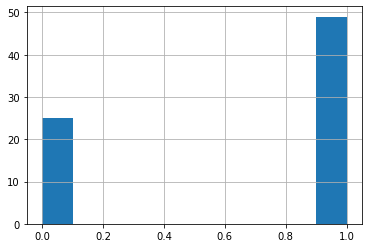

In [12]:
df_test_gt.label_num.hist()

In [13]:
df_test_gt['valid']=1

In [14]:
df_test_gt.to_csv('df_test_gt_new.csv')